# Hierarchical Clustering

# ###
A.Imports
i. Imports libraries and re-editing the mall datasets
ii. Import dependencies

B.EDA
i. Data Cleaning
ii. Data analysis and pre-processing

C. Model Development
i. K-Means Clustering
ii. Hierarchical(Agglomerative) Clustering
iii. DBSCAN Clsutering

D. Evaluation
i Elbow Method
ii. Silhoutte Analysis
iii. Silhoutte Score

E. Data Analysis
i. Females underage group of 25-35 years do massive shopping
ii. Annual Income and Spending Score is led by female
iii. Correlations between Age, Annual Income and Spending Score
iv. Scatter plot and heatmap visualizations

# A.Imports
i. Imports libraries and re-editing the mall datasets
ii. Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline

In [4]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
#LOADING DATASET
df = pd.read_excel(("/Users/binitashrestha/Documents/CopyMall.xlsx"))

In [6]:
#LENGTH OF DATASET
df.shape

(370213, 5)

In [7]:
#OVERVIEW OF DATASET
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


In [8]:
#OVERVIEW OF DATASET
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,66237.000000,367779.000000,365816.000000,366965.000000
mean,69997.716790,38.860889,60.366274,50.198142
std,85713.328731,13.953249,26.113443,25.734476
min,1.000000,18.000000,15.000000,1.000000
25%,16560.000000,28.000000,40.000000,35.000000
50%,33119.000000,36.000000,61.000000,50.000000
75%,74872.000000,49.000000,78.000000,73.000000
max,370214.000000,70.000000,137.000000,99.000000


In [9]:
#OVERVIEW OF DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370213 entries, 0 to 370212
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              66237 non-null   float64
 1   Gender                  369085 non-null  object 
 2   Age                     367779 non-null  float64
 3   Annual Income (k$)      365816 non-null  float64
 4   Spending Score (1-100)  366965 non-null  float64
dtypes: float64(4), object(1)
memory usage: 14.1+ MB


# B. EDA
i. Data Cleaning
ii. Data analysis and pre-processing

In [10]:
#FINDING ROWS WITH NULLS VALUES
df.isna().sum().to_frame(name='# of missing values')

,# of missing values
CustomerID,303976
Gender,1128
Age,2434
Annual Income (k$),4397
Spending Score (1-100),3248


In [11]:
####REMOVE ALL ROWS WITH NULL VALUES
total_rows =  df.shape[0]
df.dropna(how='any',inplace=True)
remaining_rows= df.shape[0]

removed_rows = total_rows-remaining_rows
print("No. of rows removed :", removed_rows)

print(f"\nPercentage of data removed:{np.round((removed_rows/total_rows)*100,2)}%")
print(f"Percentage of data remaining:{np.round((remaining_rows/total_rows)*100,2)}%")

No. of rows removed : 304948

Percentage of data removed:82.37%
Percentage of data remaining:17.63%


In [12]:
df.shape

(65265, 5)

In [13]:
#OVERVIEW OF COLUMNS AVAILABLE
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

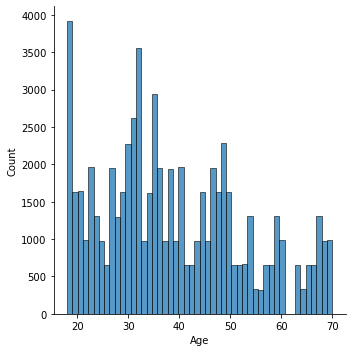

<Figure size 432x288 with 0 Axes>

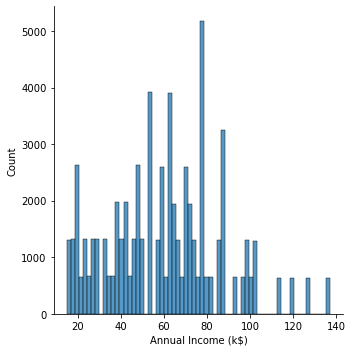

<Figure size 432x288 with 0 Axes>

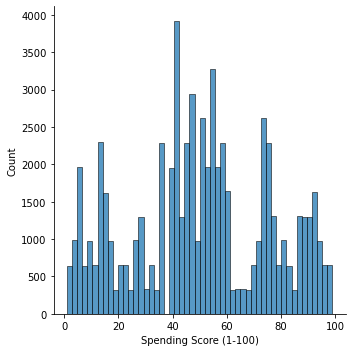

In [14]:
#PLOTING OF GENDER, ANNUAL INCOME AND SPENDING SCORE
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

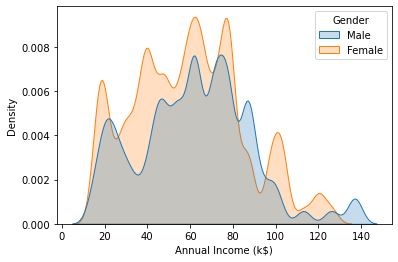

In [15]:
sns.kdeplot(df['Annual Income (k$)'], shade= True, hue= df['Gender'])

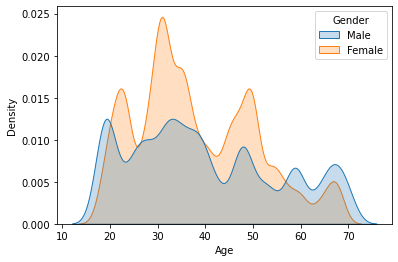

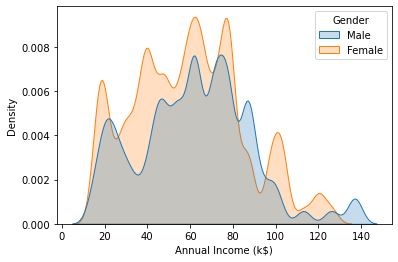

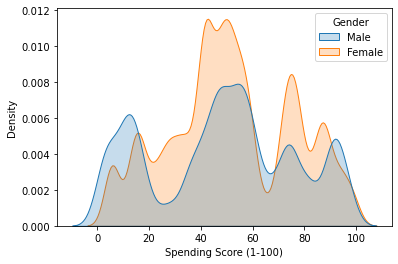

In [16]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade= True, hue= df['Gender'])

In [17]:
#number of values of male and female
df['Gender'].value_counts()

Female    36565
Male      28700
Name: Gender, dtype: int64

In [18]:
df['Gender'].value_counts(normalize= True)

Female    0.560254
Male      0.439746
Name: Gender, dtype: float64

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.100096,59.037085,51.514290
Male,39.825610,62.001568,48.526934


In [21]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.000521,-0.002335,0.000012
Age,0.000521,1.000000,-0.011372,-0.328380
Annual Income (k$),-0.002335,-0.011372,1.000000,0.009907
Spending Score (1-100),0.000012,-0.328380,0.009907,1.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

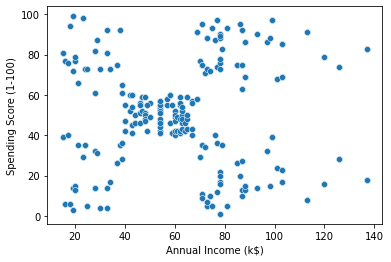

In [22]:
#annual income, gender and age for kmeans clustering
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

<AxesSubplot:>

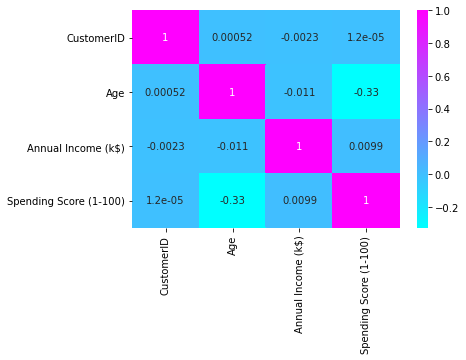

In [23]:
sns.heatmap(df.corr(), annot= True, cmap='cool')

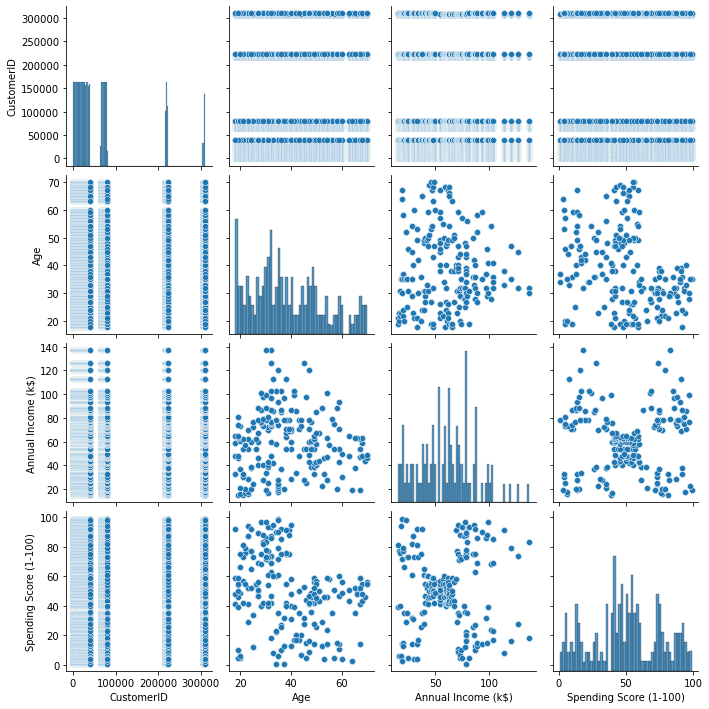

In [24]:
sns.pairplot(df)

In [25]:
df.drop('CustomerID',axis=1,inplace=True)

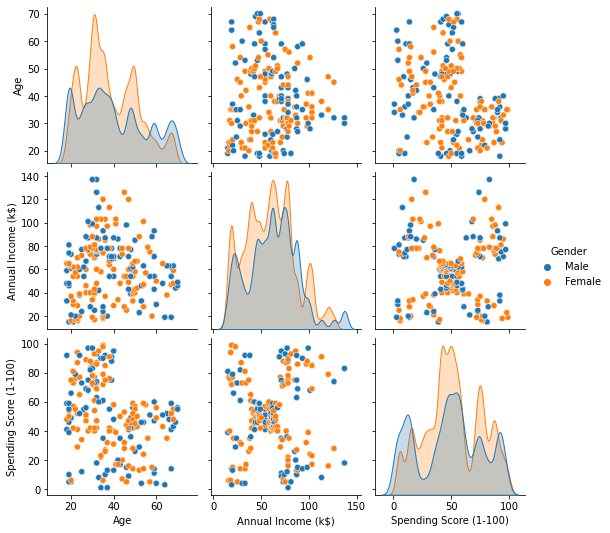

In [26]:
#VISUALIZATIONS WITHOUT CustomerID 
sns.pairplot(df, hue= 'Gender')

In [27]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

In [28]:
df['Gender']

0         0
1         0
2         1
3         1
4         1
         ..
309570    0
309571    1
309572    0
309573    1
309574    1
Name: Gender, Length: 65265, dtype: int64

In [29]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [30]:
#OUTPUTS WITH GENDER ENCODING WITH NUMERICAL VALUES.
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,65265.000000,65265.000000,65265.000000,65265.000000
mean,0.560254,38.858883,60.340703,50.200613
std,0.496360,13.950542,26.152092,25.739818
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.000000,40.000000,35.000000
50%,1.000000,36.000000,61.000000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


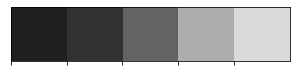

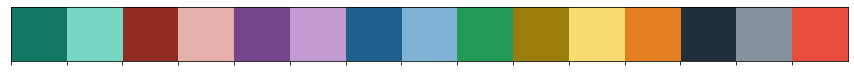

In [31]:
#SELECTING COLORS THAT CAN BE USED FOR THE PLOTTING BELOW
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
sns.palplot(colors_dark)
#colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_mix = ['#117864', '#76D7C4', '#922B21','#E6B0AA','#76448A', '#C39BD3', '#1F618D', '#7FB3D5', '#229954', '#9A7D0A', '#F7DC6F','#E67E22', '#212F3C', '#85929E','#E74C3C']
sns.palplot(colors_mix)


# C. MODEL DEVELOPMENT
ii. Hierarchical(Agglomerative) Clustering

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.decomposition import PCA

####Calling standard scaler function to remove the mean and scaling to unit variance. Here, the fit() function calculates the values of these parameters. The transform function applies the values of the parameters on the actual data and gives the normalized value. The fit_transform() function performs both in the same step. 

In [33]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

###The imports of datasets and sklearn functions like K-means includes  sklearn it’s library functions like standardscaler, silhouette_samples, silhouette_score, counter and PCA while Agglomerative Clustering from sklearn cluster and dendrogram from scipy.cluster.hierarchy is added. Then the model was called and fitted. 

In [34]:
model = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

###Plotting dendrograms that clearly show that the bottom-up (Agglomerative Clustering) has n=8 defined clusters for the value of p=8 and y=145, the major branches being represented as orange and green colors. 

In [35]:
#PLOTTING DENDOGRAMS
def plot_dendrogram(model, **kwargs): # Create linkage matrix and then plot the dendrogram
# create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

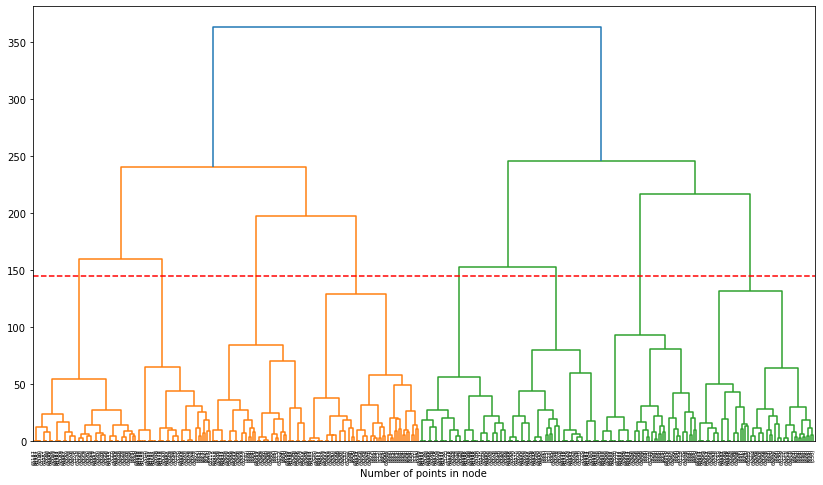

In [39]:
plt.figure(figsize=(14,8))
plot_dendrogram(model,truncate_mode = 'level',p=8)
plt.axhline(y=145, color='r', linestyle='--')
plt.xlabel("Number of points in node")
plt.show()

# D. Evaluation
ii. Silhoutte Analysis
iii. Silhoutte Score

In [37]:
silhouette_scores = [] 
for n_cluster in range(7, 15):
    silhouette_scores.append( 
        silhouette_score(X, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X))) 

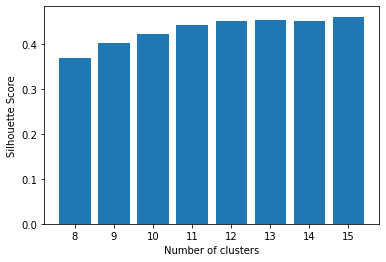

In [38]:
# Plotting a bar graph to compare the results 
k = [8, 9, 10, 11, 12, 13, 14,15] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### For n_cluster = 8 it has the silhoutte score of 0.380.
This clustering therefore provided massive branching or if the value of p is increased as well. It has a high scope of flexibility as well as demands for high computing resources. 